Aarushi Singh (as20499)\
Scientific Computing in Finance\
Final Project\
12 May 2025

# Introduction

Everyone loves a good Black Friday sale. That is until the sale is on the stock market. A historic day referred to as Black Monday took place on October 19, 1987; and it left traders stunned and portfolios gutted. This is because Black Monday was the largest single-day percentage drop in the U.S. stock market history up to that point, with the Dow Jones Industrial Average plummeting 22.6%. The exact causes remain a topic of discussion today. However, factors like program trading, portfolio insurance, and investor panic played a significant role in the crash. Black Monday illustrated just how quickly the market could panic, even when there isn’t a clear economic reason behind said panic. This raises the question: could the crash have been predicted even if there was no single cause? In their 2006 paper, “Crash of ’87 – Was it Expected?”, Ramazan Gençay and Nikola Gradojevic propose that the crash could have been predicted by analyzing the skewness premium embedded in European option prices. Using a dynamic framework based on q-Gaussian distributions and a maximum entropy principle, they find that market fears were detectable nearly two months before Black Monday through patterns in the pricing of deep out-of-the-money options.

# Methodology

This section outlines the numerical procedures introduced by Gençay and Gradojevic in their paper to identify aggregate market fears leading up to a market crash. The authors propose that early warning signs of systemic fear can be detected through distortions in the skewness premium of European option prices. They also explored the skewness premium of American option prices, as well as the entropy of the daily S&P-500 Index without use of any options market information. They calculated the time-dependent entropy with two types of skewness premium measures. The first one is the average skewness premium for options with the same time-to-maturity and strike price. The second one is the skewness premium for the deepest available out-of-the-money option pairs.

### 1. Skewness Premium

The skewness premium is a quantitative tool used to determine market expectations of asymmetry in future returns, specifically fear of large downward movement in the stock market. It reflects the idea that the pricing of deep out-of-the-money call options compared to deep out-of-the-money put options can show market expectations. If deep out-of-the-money put options are priced significantly higher than deep out-of-the-money call options, this can be an indicator the market expects downward movement. If the oppisite is true, the market may expect upward movement.

$\Large {x = \frac{P(S,T,K_p)}{C(S,T,K_c)} - 1}$

- S: the price of the underlying (S&P-500 Index for European options or S&P-500 futures price for American options)
- T: the maturity
- K_p: strike price for put options
- K_c: strike price for call options

### 2. Shannon Entropy

The Shannon entropy is used to quantify the disorder or uncertainty of a probability distribution. This means that the lower the entropy is, a certain outcome may be more predictable since certain outcomes are more likely. In other words, the distribution becomes more concentrated as entropy decreases. The higher the entropy is, the less predictable outcomes are since the outcomes are more uniformly distributed. The maximum value is reached when the distribution is fully uniform, meaning all outcomes are equally likely. This makes the outcomes random.

Given a discrete probability distribution $\{p_1, p_2, \dots , p_n \}$, the Shannon enropy is 

$\Large{\text{discrete: } S = - \sum_{i=1}^{n}p_ilog(p_i) \quad \quad \text{continuous: } S(f(x)) = -\int f(x)ln[f(x)]dx}$\
\
If two states A and B are independent so $p(A \cup B) = p(A)p(B)$,\
then $S(A \cup B) = S(A) + S(B)$ since Shannon entropy is additive

In financial markets, entropy can be used to evaluate how diverse or concentrated investor beliefs are based on signals like the skewness premium. However, Shannon entropy assumes independence between components and works best under Gaussian behavior. These assumptions are often violated in financial markets since they exhibit fat tails, long memory, and non-linear dependencies. Therefore, a generalized framework is needed.

### 3. Tsallis Entropy

To address the limitations of Shannon entropy in financial markets, Gençay and Gradojevic introduced Tsallis entropy. It is a generalization to a non-additive measure q.

$\Large{\text{discrete: } S_q = \frac{1 - \sum_{i=1}^{n}p_i^q}{q - 1} \quad \quad \text{continuous: } S_q(f(x)) = \frac{1 - \int f(x)^q dx}{q - 1}}$\
\
If two states A and B are independent so $p(A \cup B) = p(A)p(B)$,\
then $S_q(A \cup B) = S_q(A) + S_q(B) - (1-q)S_q(A)S_q(B)$ since q is non-additive

Gençay and Gradojevic build on the concept of belief heterogeneity to explain Tsallis entropy. Belief heterogeneity is the idea that investors hold different views about future market movements. When beliefs are diverse, option prices reflect a wide spread of expectations so the distribution is more uniform. As market uncertainty grows, these beliefs begin to converge so the pricing signals become more concentrated. This is belief homogeneity. Tsallis entropy quantifies this shift by measuring how dispersed or clustered the distribution of the skewness premium becomes over time.

### 4. The q-Gaussian Distribution

The maximum entropy principle for Tsallis entropy under the constraints specified below yields the q-Gaussian probability density function.

Constraints: $\int f(x)\, dx = 1,\quad \frac{\int x^2 f(x)^q \, dx}{\int f(y)^q \, dy} = \sigma^2$

$\Large{f(x) = \frac{\exp_q(-\beta_q x^2)}{\int \exp_q(-\beta_q x^2) \, dx} \propto \left[1 + (1 - q)(-\beta_q x^2)\right]^{\frac{1}{1 - q}}}$
- $q$: controls tail thickness and memory
- $\beta$: a scaling parameter related to variance

where $\beta_q$ is a function of $q$ and $\exp_q(x)$ is the $q$-exponential function defined by

$\exp_q(x) = 
\begin{cases}
\left[1 + (1 - q)x\right]^{\frac{1}{1 - q}} & \text{if } 1 + (1 - q)x > 0 \\
0 & \text{otherwise}.
\end{cases}$

### 5. Implementation

The authors implement $S_q$ for a time series of observations $x_t$, $t = 1, \ldots, T$ involves the following steps:

Define a moving window ($X$) with $K$ observations

$X = \{x_{t,k}, k = 1, \ldots, K\}$

Define the set $\{I_i = [x_{i-1}, x_i), i = 1, \ldots, n\}$ of disjoint intervals such that

$D = \bigcup_{i=1}^{n} I_i$

where $D = x_n - x_0$ is the range of $X$ and $p_i$ be the probability that $x_t$ belongs to the interval $I_i$.

Then $p_i$ is defined as the ratio between the number of observations found within $I_i$ and the total number of observations ($K$).

Gençay and Gradojevic track the evolution of discrete $S_q$ over time for $x_t$ using a moving window, based on the percentage difference between call and put prices. In other words, it is based on the skewness premiuim. The entropy calculation accounts for the following considerations:
1. **Number of States:** Using too few states may fail to capture market sentiment accurately, while too many states can obscure subtle variations in belief dispersion. To balance resolution and interpretability, the authors fix the number of states at $n = 10$ without loss of generality.
2. **Partitioning Method:** There are two methods for partitioning the range of a signal
- **(a) Fixed partitioning**: Equipartition is applied to the full dataset and remains constant throughout the analysis.
- **(b) Adaptive partitioning**: Equipartition is recalculated within each moving window, allowing the partitioning to evolve over time.\
\
Adaptive partitioning is better suited for the purpose in the paper, as it can more effectively capture transient changes in the signal.
3. **Estimation of q:** The entropic index $q$ captures the degree of long-range dependence in financial data. Prior research suggests that higher-frequency data tends to exhibit larger $q$ values, typically around 1.4. Lower-frequency data exhibits $q$ values closer to 1. Values between 1 and 2 highlight volatile behavior, making entropy more sensitive to changes in the distribution. In this study, $q$ is estimated by minimizing the squared error between the logarithms of the theoretical q-Gaussian density and the empirical distribution.

4. **Sliding Step ($\Delta$) and Moving Window Size (K):** The sliding step ($\Delta$) determines how frequently the moving window is advanced in time, while the window size ($K$) specifies the number of observations used to compute entropy within each window. These parameters make up the temporal resolution of the entropy measure $S_q$. To capture short-term changes in the signal, a small sliding step is used ($\Delta = 1$). For identifying longer-term trends, non-overlapping windows ($\Delta \geq K$) are suitable. For accurate estimation of the probability distribution, $K$ must be large enough to ensure statistical reliability. In this study, $\Delta = 1$ and $K = 120$ are used.

### 6. Results

**GARCH Processes:**

Generalized Autoregressive Conditional Heteroskedasticity (GARCH) models are statistical tools used to analyze and predict time-varying volatility in time series data, which is common in finance. They are particularly effective at capturing volatility clustering, which is when high-volatility periods occur in succession.

In their analysis, the authors simulate a GARCH(1,1) process to examine the behavior of dynamic entropy under different volatility. Specifically, they use the process $x_t = z_t \sigma_t$ with $\sigma_t^2 = c + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2$, where $z_t$ is a standard normal variable. They calculate Tsallis entropy with the parameters as $q = 2$, $n = 10$ intervals, moving window of $K = 200$ days, and 2,000 total observations. I will replicate this setup through code to illustrate how entropy responds under contrasting volatility conditions.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

The function below simulates a GARCH(1,1) process using standard normal innovations.\
\
Inputs:
- c, alpha, beta: GARCH(1,1) parameters
- num: number of observations to simulate

Returns:

- x: simulated return series
- sigma: conditional standard deviation (volatility)

In [2]:
def generate_garch11(c, alpha, beta, num):
    # Set the random seed for reproducibility
    np.random.seed(0)
    # Generate standard normal innovations
    zlist = np.random.normal(0, 1, num)
    # Initialize arrays for conditional variances and return series
    sigmasq = np.zeros(num)
    x = np.zeros(num)
    
    # Set initial variance using unconditional variance formula
    sigmasq[0] = c / (1 - alpha - beta)
    # Generate first return using initial variance and shock
    x[0] = np.sqrt(sigmasq[0]) * zlist[0]
    
    # Recursively generate the GARCH(1,1) process
    for t in range(1, num):
        # Update conditional variance based on past squared return and variance
        sigmasq[t] = c + alpha * x[t-1]**2 + beta * sigmasq[t-1]
        
        # Compute return using current volatility (standard deviation) and shock
        x[t] = np.sqrt(sigmasq[t]) * zlist[t]
    
    # Return the simulated returns and volatility
    return x, np.sqrt(sigmasq)

The function below computes Tsallis entropy from a window of values\
\
Inputs:
- values: array of data in the window
- q_val: entropic index
- num_bins: number of histogram bins

Returns:

- Tsallis entropy value for the window

In [3]:
def tsallis_entropy(values, q_val, num_bins):
    # Compute histogram of input values with specified number of bins
    hist, bin_edges = np.histogram(values, bins=num_bins, density=True)
    # Convert histogram to probability mass by multiplying with bin width
    p_val = hist * np.diff(bin_edges)
    
    # Filter out zero probabilities to avoid log or division issues
    p_val = p_val[p_val > 0]
    
    # If q = 1, return Shannon entropy
    if q_val == 1:
        return -np.sum(p_val * np.log(p_val))
    else:
        # Compute Tsallis entropy for q not equal 1
        return (1 - np.sum(p_val**q_val)) / (q_val - 1)

The function below computes entropy over rolling windows\
\
Inputs:
- x: time series data
- q_val: entropic index
- K: window size
- delta: step size for sliding window
- num_bins: number of bins

Returns:

- entropy_values: array of entropy values over time

In [4]:
def compute_entropy_series(x, q_val, K, delta, num_bins):
    # Initialize list to store entropy values
    entropy_values = []
    
    # Slide a window of size K across the time series with step size delta
    for i in range(0, len(x) - K + 1, delta):
        # Extract the current window from the time series
        window = x[i:i+K]
        # Compute Tsallis entropy for the window
        S_q = tsallis_entropy(window, q_val, num_bins)
        # Append the result to the list
        entropy_values.append(S_q)
    
    # Return the list of entropy values
    return np.array(entropy_values)

Set up the simulation to execute

In [5]:
# Sets GARCH parameters and calculates entropy series
num_obs = 2000
K = 200
num_bins = 10
q_val = 2
delta = 1

# Two GARCH settings: low vs high persistence
params_low = (0.5, 0.05, 0.05)
params_high = (0.5, 0.5, 0.4999)

# Simulate the return and volatility series
x_low, sigma_low = generate_garch11(*params_low, num_obs)
x_high, sigma_high = generate_garch11(*params_high, num_obs)

# Compute entropy series
entropy_low = compute_entropy_series(x_low, q_val, K, delta, num_bins)
entropy_high = compute_entropy_series(x_high, q_val, K, delta, num_bins)

# Align volatility to the rolling entropy windows
sigma_low_K = sigma_low[K-1:]
sigma_high_K = sigma_high[K-1:]

Plot the graphs

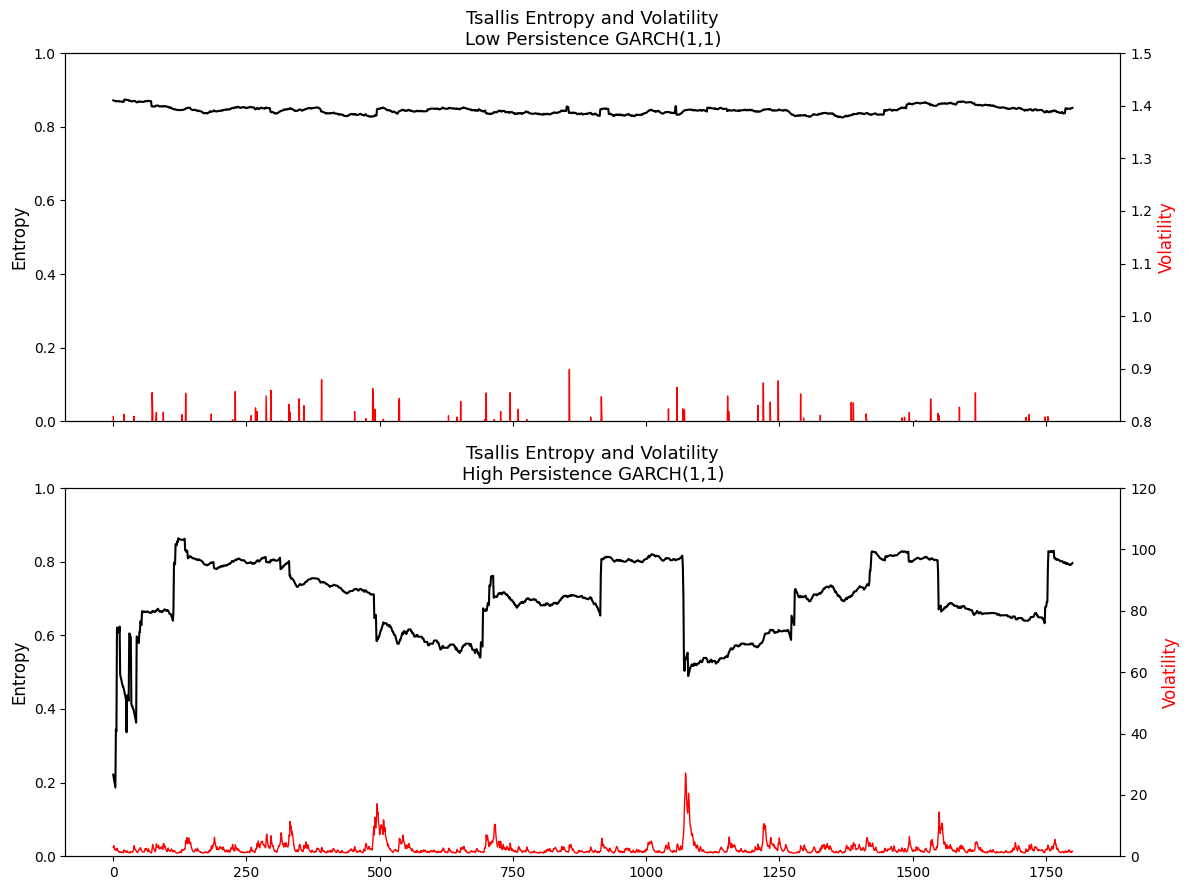

In [6]:
# Plots entropy and volatility with dual y-axes
fig, axs = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

# Top plot: low persistence
ax1 = axs[0]
ax1.plot(entropy_low, color='black', linewidth=1.5)
ax1.set_ylabel("Entropy", fontsize=12)
ax1.set_ylim(0, 1)
ax1b = ax1.twinx()
ax1b.plot(sigma_low_K, color='red', linewidth=1)
ax1b.set_ylabel("Volatility", color='red', fontsize=12)
ax1b.set_ylim(0.8, 1.5)
ax1.set_title("Tsallis Entropy and Volatility\nLow Persistence GARCH(1,1)", fontsize=13)

# Bottom plot: high persistence
ax2 = axs[1]
ax2.plot(entropy_high, color='black', linewidth=1.5)
ax2.set_ylabel("Entropy", fontsize=12)
ax2.set_ylim(0, 1)
ax2b = ax2.twinx()
ax2b.plot(sigma_high_K, color='red', linewidth=1)
ax2b.set_ylabel("Volatility", color='red', fontsize=12)
ax2b.set_ylim(0, 120)
ax2.set_title("Tsallis Entropy and Volatility\nHigh Persistence GARCH(1,1)", fontsize=13)

plt.xlabel("Time", fontsize=12)
plt.tight_layout()
plt.show()

In the paper, the authors model GARCH(1,1) processes to illustrate how Tsallis entropy responds under different volatility conditions. This controlled experiment highlights that entropy remains stable during periods of low volatility persistence, but it drops significantly when volatility becomes clustered. This is seen in high-stress environments. The purpose of this model is to establish a benchmark that demonstrates that entropy can effectively capture shifts in market uncertainty. This lays the groundwork for the application to real option data behavior leading up to the 1987 crash.

**American:**

The authors start out by taking a look at American options data. Using hourly American option data from Bates (1991) to assess market expectations leading up to the 1987 crash, the authors compute Tsallis entropy from the two skewness premium measures mentioned earlier. One is the average deviation between matched call and put options and two is the average deviation between matched call and put options for the deepest out-of-the-money (OTM) options. The skewness measures are supposed to reflect the asymmetry in market sentiment. They graph their data to find that the entropy derived from American options data shows a notable decline beginning in May 1987, with sharper drops during trading hours on October 19 and 20. The deepest OTM options provide more early warning than the average skewness premium, which is composed of signals that are not uniformly strong and recover intermittently before the crash.

**European:**

The authors continue their analysis to daily European instruments.  They also looked at the entropy for the daily S&P-500 Index without the use of any options. This index did not provide any advance warnings, and there were no significant changes in the entropy level prior to the 1987 crash. They primarly focus on results from European options from the CBOE. They found that European options offer more distinct and timely signals compared to American options. This can be seen when entropy measures based on the skewness premium exhibit a sharp decline leading up to the October 19 crash. They drop from 0.76 to 0.06 in the days preceeding the event. The entropy associated with the deepest OTM options falls earlier. Their value drops from 0.92 to 0.02 on August 25, which signals a significant decline in the belief heterogeneity. This sustained decline suggests that European options provided a clearer and earlier warning of the 1987 crash. I will replicate this behavior using the same entropy-based framework.

**Replication of Results**

Due to the lack of readily available options data from 1987, I will replicate the results for the 2008 and 2020 Stock Market Crash. The ideas presented in the paper are not specific to a single crash, but they aim to capture the broader dynamics of market stress and belief heterogeneity during periods of uncertainty. Their purpose is to show that market crashes, specifically the crash of 87, can be predicted by analyzing early warning signals in European option prices using entropy and skewness premium measures. The 2008 financial crisis and the pandemic-driven market crash of 2020 are suitable and well-documented case studies to look at the effectiveness of entropy-based indicators in detecting early warning signals of market disruptions. Through the replication of the methods developed by Gençay and Gradojevic, I aim to demonstrate the potential for these techniques to be utilized by traders and portfolio managers as a tool for anticipating market crashes and mitigating portfolio losses.

# Replication for the 2008 Stock Market Crash

| **Date**         | **Event**                                                 | **S&P 500 Change** | **Notes**                                 |
|------------------|-----------------------------------------------------------|--------------------|--------------------------------------------|
| September 15     | Lehman Brothers declares bankruptcy                       | −4.7%              | Start of acute market stress               |
| September 29     | U.S. House rejects bank bailout (TARP)                    | −8.8%              | Largest single-day point drop at that time |
| October 6        | Beginning of crash week                                   | −3.8%              | Start of 5-day plunge                      |
| October 7        | Continued panic                                           | −5.7%              | Markets react to global selloff            |
| October 9        | Ongoing losses                                            | −7.6%              | Capitulation by investors                  |
| October 10       | Temporary bottom reached                                  | +0.6%              | Intra-day swings over 10%                  |
| October 15       | Panic selling resumes                                     | −9.0%              | Fear of global recession                   |
| October 24       | Global stock rout                                         | −3.5%              | Continued credit market freeze             |
| November 20      | Market hits new low for the year                          | −6.7%              | Intra-day low for S&P 500 in 2008          |

### Data
- **Name:** option_data.csv
- **Dates:** 2 June 2008 to 26 December 2008
- **Location:** Same folder as this file
- **Symbol:** SPX
- **Columns:**
  - symbol
  - exchange
  - date
  - adjusted close
  - option symbol
  - expiration
  - strike
  - call/put
  - style
  - ask
  - bid
  - volume
  - open interest
  - unadjusted

In [7]:
# Import required libraries that are not already imported
import pandas as pd

Load and clean data into a dataset to only include needed information

In [8]:
# Load the option dataset
option_df = pd.read_csv('option_data.csv')

# Convert date columns to datetime format
option_df['date'] = pd.to_datetime(option_df['date'])
option_df['expiration'] = pd.to_datetime(option_df['expiration'])

# Filter dataset for European SPX options traded on the CBOE within the relevant date range
filtered_df = option_df[
    (option_df['symbol'] == 'SPX') &
    (option_df['exchange'] == 'CBOE') &
    (option_df['style'] == 'E') &
    (option_df['date'] >= '2008-06-02') &
    (option_df['date'] <= '2008-12-26')
].copy()

Split into calls and puts to match options of the same strike for the average skewness premium

In [9]:
# Calculate the mid-price from bid and ask
filtered_df['mid_price'] = (filtered_df['ask'] + filtered_df['bid']) / 2

# Split the dataframe into calls and puts
calls_df = filtered_df[filtered_df['call/put'] == 'C']
puts_df = filtered_df[filtered_df['call/put'] == 'P']

# Create pivot tables of call and put mid prices indexed by date and strike
call_matrix = calls_df.groupby(['date', 'strike'])['mid_price'].mean().unstack()
put_matrix = puts_df.groupby(['date', 'strike'])['mid_price'].mean().unstack()

# Identify common strikes between calls and puts
shared_strikes = call_matrix.columns.intersection(put_matrix.columns)
call_matrix = call_matrix[shared_strikes]
put_matrix = put_matrix[shared_strikes]

# Compute skewness premium: % deviation of put from call
skew_premium_avg = (put_matrix / call_matrix) - 1  # Average skewness premium

Define a function for calculating Tsallis entropy

In [10]:
def tsallis_entropy(prob_vector, q_index):
    p = prob_vector[prob_vector > 0]
    return (1 - np.sum(p**q_index)) / (q_index - 1) if q_index != 1 else -np.sum(p * np.log(p))

Define a function for the rolling entropy computation across skewness matrix

In [11]:
def compute_entropy_from_matrix(matrix, q_index=2, num_bins=10):
    entropy_vals = []
    prob_matrix = []

    for _, row in matrix.iterrows():
        # Drop missing values and compute histogram
        hist, _ = np.histogram(row.dropna(), bins=num_bins, density=True)

        # Normalize to get probability distribution
        p = hist / np.sum(hist)

        # Store Tsallis entropy and probability distribution
        entropy_vals.append(tsallis_entropy(p, q_index))
        prob_matrix.append(p)

    # Create DataFrame of belief probabilities (s1 to s10)
    prob_table = pd.DataFrame(prob_matrix, index=matrix.index,
                              columns=[f"s{i+1}" for i in range(num_bins)])

    # Create entropy Series
    entropy_series = pd.Series(entropy_vals, index=matrix.index)

    return prob_table, entropy_series

Compute the entropy for the average skewness premium and the skewness premium for the deepest OTM options

In [12]:
# Average Skewness Premium Entropy
prob_table_avg, entropy_avg = compute_entropy_from_matrix(skew_premium_avg)

summary_table = prob_table_avg.copy()
summary_table["TE"] = entropy_avg

# Print table: first and last 5 rows
print("Table: Average Skewness Premium Entropy (2008)\n")
print(pd.concat([summary_table.head(5), summary_table.tail(5)]).round(2).to_string())

# Deepest OTM Skewness Premium and Entropy
deep_otm_premiums = []
for date in skew_premium_avg.index:
    row = skew_premium_avg.loc[date].dropna()
    if len(row) >= 2:
        deep_put = row.iloc[0]   # lowest strike
        deep_call = row.iloc[-1] # highest strike
        deep_avg = (deep_put + deep_call) / 2
    else:
        deep_avg = np.nan
    deep_otm_premiums.append(deep_avg)

deep_otm_series = pd.Series(deep_otm_premiums, index=skew_premium_avg.index)

# Entropy and belief probabilities for deep OTM
deep_otm_df = pd.DataFrame(deep_otm_series, columns=["Deep OTM"])
prob_table_deep, entropy_deep = compute_entropy_from_matrix(deep_otm_df, q_index=2, num_bins=10)

# Print belief distribution table for Deep OTM
deep_summary_table = prob_table_deep.copy()
deep_summary_table["TE"] = entropy_deep
print("\nTable: Deepest OTM Skewness Premium Belief Distribution (2008)\n")
print(pd.concat([deep_summary_table.head(5), deep_summary_table.tail(5)]).round(2).to_string())

# Rolling entropy for Deep OTM series (used in graph)
window_size = 10
deep_entropy_series = deep_otm_series.rolling(window=window_size).apply(
    lambda x: tsallis_entropy(np.histogram(x.dropna(), bins=5, density=True)[0], q_index=2),
    raw=False
)

# Create combined DataFrames for graph plotting
avg_table = pd.DataFrame({
    "Avg Skewness Premium": skew_premium_avg.mean(axis=1),
    "Entropy (Avg)": entropy_avg
})

deep_table = pd.DataFrame({
    "Deep OTM Skewness Premium": deep_otm_series,
    "Entropy (OTM)": deep_entropy_series
})

Table: Average Skewness Premium Entropy (2008)

              s1    s2    s3    s4    s5    s6    s7    s8    s9   s10    TE
date                                                                        
2008-06-02  0.84  0.09  0.02  0.00  0.01  0.00  0.00  0.01  0.01  0.03  0.28
2008-06-03  0.81  0.10  0.04  0.00  0.00  0.01  0.00  0.01  0.01  0.03  0.34
2008-06-04  0.80  0.11  0.05  0.00  0.01  0.00  0.00  0.01  0.01  0.02  0.35
2008-06-05  0.89  0.05  0.01  0.00  0.00  0.01  0.01  0.01  0.00  0.03  0.20
2008-06-06  0.80  0.09  0.05  0.01  0.00  0.00  0.01  0.01  0.02  0.01  0.35
2008-12-19  0.89  0.03  0.03  0.02  0.00  0.00  0.02  0.00  0.00  0.01  0.21
2008-12-22  0.89  0.04  0.01  0.01  0.00  0.02  0.02  0.00  0.00  0.01  0.20
2008-12-23  0.86  0.06  0.03  0.01  0.00  0.02  0.02  0.00  0.00  0.01  0.26
2008-12-24  0.85  0.05  0.05  0.01  0.00  0.02  0.02  0.00  0.00  0.01  0.28
2008-12-26  0.88  0.05  0.01  0.02  0.01  0.00  0.00  0.01  0.00  0.02  0.22

Table: Deepest OTM Skewness

Plot the graphs

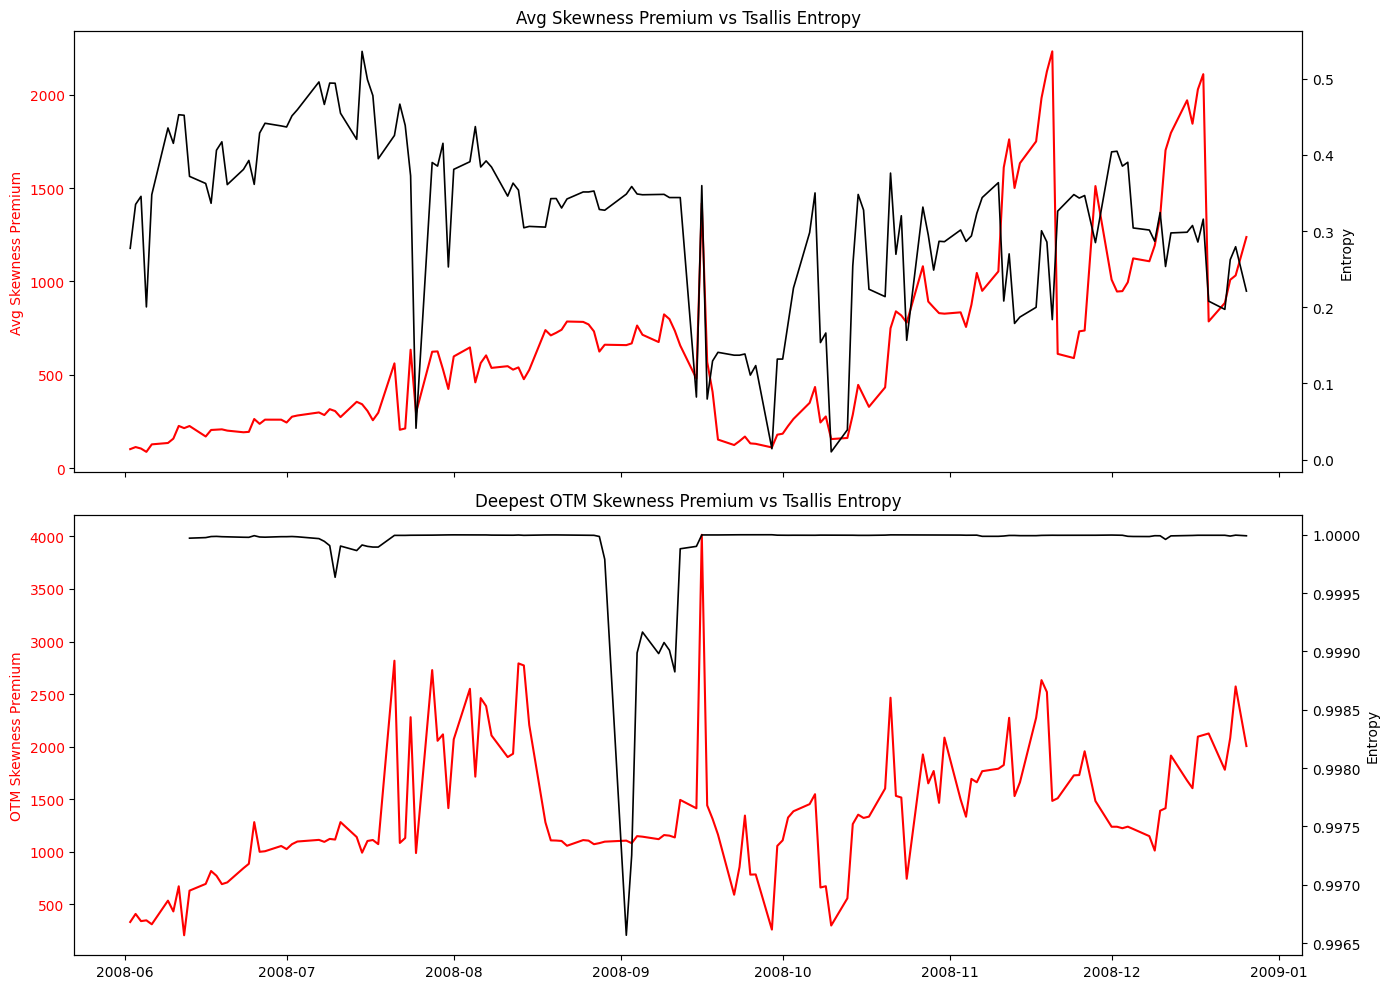

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Top: Avg Skew vs Entropy
ax1 = axes[0]
ax1.plot(avg_table["Avg Skewness Premium"], color='red', label='Avg Skewness Premium')
ax1.set_ylabel("Avg Skewness Premium", color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1b = ax1.twinx()
ax1b.plot(avg_table["Entropy (Avg)"], color='black', linewidth=1.2, label='Entropy')
ax1b.set_ylabel("Entropy", color='black')
ax1b.tick_params(axis='y', labelcolor='black')
ax1.set_title("Avg Skewness Premium vs Tsallis Entropy")

# Bottom: Deep OTM Skew vs Entropy
ax2 = axes[1]
ax2.plot(deep_table["Deep OTM Skewness Premium"], color='red', label='Deepest OTM Skewness Premium')
ax2.set_ylabel("OTM Skewness Premium", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2b = ax2.twinx()
ax2b.plot(deep_table["Entropy (OTM)"], color='black', linewidth=1.2, label='Entropy')
ax2b.set_ylabel("Entropy", color='black')
ax2b.tick_params(axis='y', labelcolor='black')
ax2.set_title("Deepest OTM Skewness Premium vs Tsallis Entropy")

plt.xlabel("Date")
plt.tight_layout()
plt.show()

### Interpretation of the Results

Leading up to the October 2008 market crash, both the average skewness premium and Tsallis entropy shifted in ways that signaled rising market distress. From mid-September, following the collapse of Lehman Brothers on September 15, entropy began to decline sharply. As seen in the table, the average entropy dropped from around 0.35 on June 6 to as low as 0.20 by September 22. It stayed low through early October. Simultaneously, the skewness premium increased. It peaked above 2000 in early October, just before the sharp S&P 500 declines on October 6, 7, and 9. Entropy remained suppressed while the skewness premium stayed elevated through the market bottom on October 10 and afterwards.

In the deep out-of-the-money options, the signals indicating market distress were even more extreme. Entropy dropped to near-zero levels as early as June and persisted through the fall. This reflected sharp homogeneity in investor expectations. Meanwhile, the deep OTM skewness premium rose rapidly from under 1000 in July to nearly 3000 by late September. It peaked around the time of the crash. These results support Gençay and Gradojevic’s findings that deep OTM options can serve as an earlier and more accurate indicator of systemic fear, offering valuable warning signs before major market disruptions.

# Replication for the 2020 Stock Market Crash

| **Date**         | **Event**                                         | **S&P 500 Change** | **Notes**                                        |
|------------------|---------------------------------------------------|--------------------|--------------------------------------------------|
| February 20      | Market peak before COVID-19 selloff              | −0.38%             | Last trading high before crash began             |
| February 24      | Start of sharp decline                           | −3.4%              | First major drop as virus fears spread globally  |
| March 9          | First major crash ("Black Monday I")             | −7.6%              | Oil price war and virus fears trigger panic      |
| March 12         | Second crash ("Black Thursday")                  | −9.5%              | Travel ban announced by U.S.                     |
| March 16         | Third crash ("Black Monday II")                  | −12.0%             | Largest one-day drop since 1987                  |
| March 23         | Market bottom                                    | −33.9%             | S&P 500 hits lowest closing level of the year    |

### Data
- **Name 1:** option_data2020.csv
- **Dates:** 24 January 2020 to 30 April 2020
- **Name 2:** option_2data2020.csv
- **Dates:** 1 January 2020 to 23 January 2020
- **Location:** Same folder as this file
- **Symbol:** SPX
- **Columns:**
  - symbol
  - exchange
  - date
  - adjusted close
  - option symbol
  - expiration
  - strike
  - call/put
  - style
  - ask
  - bid
  - volume
  - open interest
  - unadjusted

Load in data for 2020 and combine the data from both files

In [14]:
df1 = pd.read_csv('option_2data2020.csv')
df2 = pd.read_csv('option_data2020.csv')

# Combine them into a single DataFrame
option_df = pd.concat([df1, df2], ignore_index=True)

# Optional: sort by date if needed
option_df['date'] = pd.to_datetime(option_df['date'])
option_df = option_df.sort_values('date').reset_index(drop=True)

# Convert date columns to datetime format
option_df['date'] = pd.to_datetime(option_df['date'])
option_df['expiration'] = pd.to_datetime(option_df['expiration'])

# Filter dataset for European SPX options traded on the CBOE within the relevant date range
filtered_df = option_df[
    (option_df['symbol'] == 'SPX') &
    (option_df['exchange'] == 'CBOE') &
    (option_df['style'] == 'E') &
    (option_df['date'] >= '2020-01-01') &
    (option_df['date'] <= '2020-04-30')
].copy()

The steps and code are the same as for 2020 as for 2008 from this point onwards so functions are not defined again

Table: Average Skewness Premium Entropy (2020)

              s1    s2    s3    s4    s5    s6    s7   s8    s9   s10    TE
date                                                                       
2020-01-02  0.94  0.02  0.01  0.01  0.01  0.00  0.00  0.0  0.00  0.01  0.11
2020-01-03  0.95  0.01  0.02  0.00  0.01  0.00  0.00  0.0  0.00  0.01  0.10
2020-01-06  0.94  0.02  0.02  0.01  0.00  0.00  0.00  0.0  0.00  0.01  0.12
2020-01-07  0.93  0.03  0.02  0.01  0.00  0.00  0.00  0.0  0.00  0.01  0.14
2020-01-08  0.94  0.02  0.01  0.01  0.01  0.00  0.00  0.0  0.00  0.01  0.11
2020-04-24  0.93  0.04  0.01  0.00  0.00  0.00  0.00  0.0  0.01  0.01  0.13
2020-04-27  0.96  0.02  0.00  0.00  0.00  0.01  0.00  0.0  0.00  0.00  0.07
2020-04-28  0.93  0.04  0.01  0.01  0.00  0.00  0.00  0.0  0.01  0.01  0.14
2020-04-29  0.96  0.02  0.00  0.00  0.01  0.00  0.01  0.0  0.00  0.00  0.07
2020-04-30  0.96  0.02  0.01  0.01  0.00  0.00  0.00  0.0  0.00  0.00  0.08

Table: Deepest OTM Skewness Premium Bel

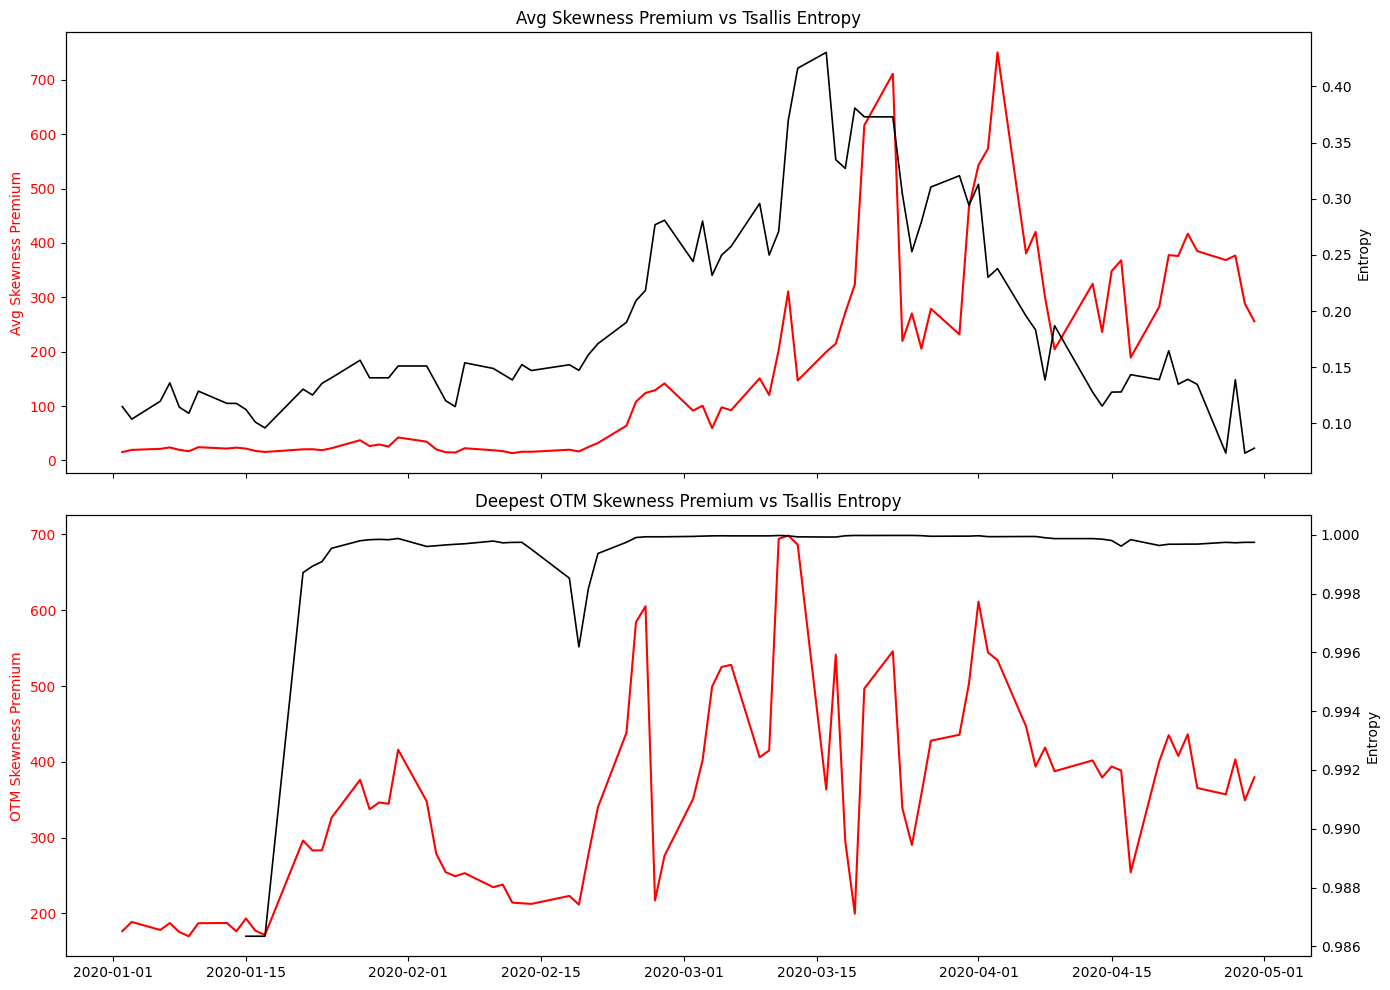

In [15]:
# Calculate the mid-price from bid and ask
filtered_df['mid_price'] = (filtered_df['ask'] + filtered_df['bid']) / 2

# Split the dataframe into calls and puts
calls_df = filtered_df[filtered_df['call/put'] == 'C']
puts_df = filtered_df[filtered_df['call/put'] == 'P']

# Create pivot tables of call and put mid prices indexed by date and strike
call_matrix = calls_df.groupby(['date', 'strike'])['mid_price'].mean().unstack()
put_matrix = puts_df.groupby(['date', 'strike'])['mid_price'].mean().unstack()

# Identify common strikes between calls and puts
shared_strikes = call_matrix.columns.intersection(put_matrix.columns)
call_matrix = call_matrix[shared_strikes]
put_matrix = put_matrix[shared_strikes]

# Compute skewness premium: % deviation of put from call
skew_premium_avg = (put_matrix / call_matrix) - 1  # Average skewness premium

# Average Skewness Premium Entropy
prob_table_avg, entropy_avg = compute_entropy_from_matrix(skew_premium_avg)

summary_table = prob_table_avg.copy()
summary_table["TE"] = entropy_avg

# Print table: first and last 5 rows
print("Table: Average Skewness Premium Entropy (2020)\n")
print(pd.concat([summary_table.head(5), summary_table.tail(5)]).round(2).to_string())

# Deepest OTM Skewness Premium and Entropy
deep_otm_premiums = []
for date in skew_premium_avg.index:
    row = skew_premium_avg.loc[date].dropna()
    if len(row) >= 2:
        deep_put = row.iloc[0]   # lowest strike
        deep_call = row.iloc[-1] # highest strike
        deep_avg = (deep_put + deep_call) / 2
    else:
        deep_avg = np.nan
    deep_otm_premiums.append(deep_avg)

deep_otm_series = pd.Series(deep_otm_premiums, index=skew_premium_avg.index)

# Entropy and belief probabilities for deep OTM
deep_otm_df = pd.DataFrame(deep_otm_series, columns=["Deep OTM"])
prob_table_deep, entropy_deep = compute_entropy_from_matrix(deep_otm_df, q_index=2, num_bins=10)

# Print belief distribution table for Deep OTM
deep_summary_table = prob_table_deep.copy()
deep_summary_table["TE"] = entropy_deep
print("\nTable: Deepest OTM Skewness Premium Belief Distribution (2020)\n")
print(pd.concat([deep_summary_table.head(5), deep_summary_table.tail(5)]).round(2).to_string())

# Rolling entropy for Deep OTM series (used in graph)
window_size = 10
deep_entropy_series = deep_otm_series.rolling(window=window_size).apply(
    lambda x: tsallis_entropy(np.histogram(x.dropna(), bins=5, density=True)[0], q_index=2),
    raw=False
)

# Create combined DataFrames for graph plotting
avg_table = pd.DataFrame({
    "Avg Skewness Premium": skew_premium_avg.mean(axis=1),
    "Entropy (Avg)": entropy_avg
})

deep_table = pd.DataFrame({
    "Deep OTM Skewness Premium": deep_otm_series,
    "Entropy (OTM)": deep_entropy_series
})

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Top: Avg Skew vs Entropy
ax1 = axes[0]
ax1.plot(avg_table["Avg Skewness Premium"], color='red', label='Avg Skewness Premium')
ax1.set_ylabel("Avg Skewness Premium", color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1b = ax1.twinx()
ax1b.plot(avg_table["Entropy (Avg)"], color='black', linewidth=1.2, label='Entropy')
ax1b.set_ylabel("Entropy", color='black')
ax1b.tick_params(axis='y', labelcolor='black')
ax1.set_title("Avg Skewness Premium vs Tsallis Entropy")

# Bottom: Deep OTM Skew vs Entropy
ax2 = axes[1]
ax2.plot(deep_table["Deep OTM Skewness Premium"], color='red', label='Deepest OTM Skewness Premium')
ax2.set_ylabel("OTM Skewness Premium", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2b = ax2.twinx()
ax2b.plot(deep_table["Entropy (OTM)"], color='black', linewidth=1.2, label='Entropy')
ax2b.set_ylabel("Entropy", color='black')
ax2b.tick_params(axis='y', labelcolor='black')
ax2.set_title("Deepest OTM Skewness Premium vs Tsallis Entropy")

plt.xlabel("Date")
plt.tight_layout()
plt.show()

### Interpretation of the Results

In the weeks leading up to the 2020 market crash, both the average skewness premium and Tsallis entropy began showing signs of growing market stress. Starting in early February, the average skewness premium steadily climbed. It jumped from around 100 on February 3 to over 300 by February 24. Around the same time, entropy began to decline. It fell from approximately 0.35 in mid-February to below 0.20 by early March. These shifts occurred just before the sharp S&P 500 drops on March 9, March 12, and March 16; when the index fell by 7.6%, 9.5%, and 12%, respectively. By the time the market bottomed on March 23, entropy had already reached some of its lowest values. This suggests that both indicators gave advance warning of deteriorating sentiment.

The deepest out-of-the-money options highlighted this pattern even more clearly. Entropy was at its highest on January 17, and then it began declining steadily until it almost reached zero by late February. Meanwhile, the skewness premium in these deep OTM options surged rapidly from February 24 through March 13. These changes occurred ahead of the most severe market declines, reinforcing the view that deep OTM options provide earlier and stronger signals of systemic fear compared to the averages.

# Future Applications and Closing Remarks

The results of analyzing patterns in European option prices using entropy and skewness premium measures for the 2008 and 2020 market crashes reinforce the findings of Ramazan Gençay and Nikola Gradojevic in “Crash of ’87 – Was it Expected?” In both the 2008 financial crisis and the 2020 market collapse, the skewness premium rose as investors sought downside protection. Meanwhile, the Tsallis entropy declined to reflect a reduction in belief heterogeneity across the market. These movements in the entropy and skewness premium often preceded the most severe equity market declines. In particular, the deepest out-of-the-money skewness premium and the associated entropy for European options provided stronger and earlier signals than the average measures. This supports the Gençay and Gradojevic's conclusion that deep out-of-the-money options more effectively capture shifts in collective investor sentiment.

The authors extended their methodology in a follow up study, "The Tale of Two Financial Crises: An Entropic Perspective." In this paper, they applied the same techniques to the 2008 crash. Their results mirrored those found for the 1987 crash, which further validates the method’s ability to identify underlying shifts in market psychology prior to large-scale changes. The replication for the 2008 stock market crash that was done in an ealier section of this paper used the methodology specified in the 2006 paper, but it closely aligns with their conclusions in the follow-up study as well. The new paper also concludes that time-dependent entropy and skewness premium signals can serve as meaningful indicators of systemic risk across different historical contexts.

This method does a good job of spotting early warning signs of market stress, particularly when applied to deep out-of-the-money options. It stands out because it measures belief dispersion using entropy, which gives a clearer view of investor sentiment compared to standard price or volatility measures. This approach does, however, come with its own set of challenges. The methodology depends on options data and can be thrown off by illiquidity or wide bid-ask spreads. Running it in real time may also require more computational power than simpler models. Still, these limitations are manageable so the applications of the results can be considered. This method can be beneficial for traders and portfolio managers, especially those focused on systemic risk or volatility-driven strategies. It offers useful insight during uncertain times and could help reduce losses before large downturns. The fact that it consistently highlighted stress ahead of the 2008 and 2020 crashes shows its real-world value in predicting downturns in the stock market.

The applications of the methods in the 2006 paper can be particularly beneficial in today's markets. With renewed geopolitical tensions, ongoing trade uncertainty, and tariff negotiations impacting global sentiment; the markets continue to experience periods of sudden stress. This entropic methodology can be used as a real-time monitoring tool for traders, risk managers, and policy analysts that are aiming to identify changes in belief heterogeneity before the changes in views of investors lead to price crashes. By analyzing options data alongside entropy trends, traders may gain a deeper understanding of crowd behavior, hedging pressure, and the subtle emergence of systemic risk in addition to being able to avoid losses in the event of a market crash.

# References

Gençay, Ramazan, and Nikola Gradojevic. *Crash of '87 – Was it Expected? Aggregate Market Fears and Long-Range Dependence.* September 2006. Semantic Scholar, https://www.semanticscholar.org/paper/db0b7ac09c433b403930aafcdf93dcbdb75f6df3. Accessed 11 May 2025.